# Combining Datasets with Pandas

#### Creation of a new environment which contains geopandas

Why's that?  
In this notebook we want to use the GeoPandas package, which is based on an _open source project to add support for geographic data to pandas objects._ - in brief: we will have a dataframe with an additional geometric datatype.  

Since we usually don't need packages for geospatial data, we don't want to load it everytime we activate our usual nf_base environment.  

Let's create a new environment called 'nf_geo', that has 'geopandas' installed.

In [57]:
# clone the nf_base - this may take a few seconds up to two minutes ...
#!conda create --yes --name nf_geo python=3.9 \
#    matplotlib pandas=1.5.2 geopandas scipy seaborn statsmodels scikit-learn ipykernel numpy pip

*(If this last step takes longer than up to a minute and there's a message telling you conda is "solving environment", please reach out to us.)*

in order to use our new environment, you have to switch the kernel and select the python kernel of your new nf_geo environment. if it doesn't appear immediately in the list of available kernels, klick on 'select another kernel'...

---

Now that we have our new nf_geo environment, activate it for this jupyter notebook (choose the kernel) and we're ready to import our needed modules:

In [58]:
# standard import of pandas
import pandas as pd

# additional import of the geopandas package
import geopandas as gpd

# numpy, "numerical python" - we'll cover this in the following notebooks.
import numpy as np

# hides warning messages
import warnings
warnings.filterwarnings("ignore")

## Loading the first dataset
The data we'll use is data on bicycle theft crimes at the granular level of Berlin city planning areas, so-called "LOR" - "Lebensweltlich orientierte Räume", we will stumble over it again later!  
This data is provided by Berlin Open Data and collected by the police of Berlin.  

### The goal of our analysis is: 
### Identify areas in Berlin with the most bike thefts and the bike type that has the highest share in thefts.

But first things first: We make the data accessible just by loading the .csv-file into a dataframe and get an overview.

[Website to datatset -  daten.berlin.de](https://daten.berlin.de/datensaetze/fahrraddiebstahl-berlin)

- Licence:
    - Creative Commons Namensnennung CC-BY License
- Geographical Granularity: 
    - Berlin
- Publisher: 
    - Polizei Berlin LKA St 14
- E Mail: 
    - onlineredaktion@polizei.berlin.de

Next comes a code cell where we define all functions, that we will use in this notebook. 

In [59]:
# Function Definitions

def clean_bike_data(df):
    # columns name tolower case
    df.columns = df.columns.str.lower()
    # drop duplicates
    df = df.drop_duplicates().copy()
    # drop column 'angelegt_am' and 'erfassungsgrund' - irrelevant to us, when and why observation got added to the database.
    df.drop(['angelegt_am', 'erfassungsgrund'], axis=1, inplace=True)
    #df = df.drop(columns=['angelegt_am', 'erfassungsgrund']) # alternative zu zeile drüber
    # we have just 167 attempts and 7 thefts of unknown state in our dataset, so we decide to drop those observations.
    df = df[df['versuch'] != 'Ja']
    df = df[df['versuch'] != 'Unbekannt']
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)
    # df.set_index('versuch', inplace=True)
    # df.drop(['Ja', 'Unbekannt'], inplace=True)
    # change date text string to datetime datatype
    df['tatzeit_anfang_datum'] = pd.to_datetime(df['tatzeit_anfang_datum'], format='%d.%m.%Y')
    df['tatzeit_ende_datum'] = pd.to_datetime(df['tatzeit_ende_datum'], format='%d.%m.%Y')
    return df

In [60]:
thefts_df_raw = pd.read_csv('../../Data/Fahrraddiebstahl.csv', encoding='latin-1') # proper encoding is necessary here!
# make column names lowercase

thefts_df_raw.sample(10)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
3971,04.10.2021,02.10.2021,18,03.10.2021,7,1100313,230,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
34659,14.03.2021,11.03.2021,17,12.03.2021,9,4500938,1199,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
19909,12.03.2020,12.03.2020,6,12.03.2020,15,3601142,650,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
23099,18.02.2021,18.02.2021,14,18.02.2021,18,6100102,2023,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
14976,10.01.2020,10.01.2020,8,10.01.2020,13,3501038,549,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
28549,09.06.2020,08.06.2020,23,09.06.2020,18,4300619,522,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
34868,08.10.2021,07.10.2021,7,07.10.2021,20,4400727,499,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
6610,05.07.2020,04.07.2020,22,05.07.2020,16,1100312,300,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
18576,31.08.2020,28.08.2020,16,31.08.2020,8,11501238,780,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
16958,01.03.2020,26.01.2020,8,26.01.2020,19,6100102,945,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [61]:
# what's the shape, the observations, datatypes and null-counts?
thefts_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            39407 non-null  object
 1   TATZEIT_ANFANG_DATUM   39407 non-null  object
 2   TATZEIT_ANFANG_STUNDE  39407 non-null  int64 
 3   TATZEIT_ENDE_DATUM     39407 non-null  object
 4   TATZEIT_ENDE_STUNDE    39407 non-null  int64 
 5   LOR                    39407 non-null  int64 
 6   SCHADENSHOEHE          39407 non-null  int64 
 7   VERSUCH                39407 non-null  object
 8   ART_DES_FAHRRADS       39407 non-null  object
 9   DELIKT                 39407 non-null  object
 10  ERFASSUNGSGRUND        39407 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


## Clean Data

In [62]:
# clean the bike data by applying the clean_bike_data function, 
# that you developed in the data_preparation exercise.

# enter code below, assign output to a new variable called thefts_df.
thefts_df = clean_bike_data(thefts_df_raw).copy()
thefts_df

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,2020-09-10,10,2020-09-10,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,2020-09-09,16,2020-09-10,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,2020-09-10,15,2020-09-10,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl
3,2020-09-10,20,2020-09-10,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl
4,2020-09-09,22,2020-09-10,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl
...,...,...,...,...,...,...,...,...,...
39132,2021-08-06,18,2021-08-09,8,1100309,600,Nein,Fahrrad,Fahrraddiebstahl
39133,2021-08-07,13,2021-08-09,8,1200522,3300,Nein,Herrenfahrrad,Fahrraddiebstahl
39134,2021-08-07,11,2021-08-09,9,6100102,499,Nein,Damenfahrrad,Fahrraddiebstahl
39135,2021-08-09,13,2021-08-09,14,2200211,300,Nein,Damenfahrrad,Fahrraddiebstahl


In [63]:
thefts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39137 entries, 0 to 39136
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tatzeit_anfang_datum   39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde  39137 non-null  int64         
 2   tatzeit_ende_datum     39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde    39137 non-null  int64         
 4   lor                    39137 non-null  int64         
 5   schadenshoehe          39137 non-null  int64         
 6   versuch                39137 non-null  object        
 7   art_des_fahrrads       39137 non-null  object        
 8   delikt                 39137 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 2.7+ MB


## Prepare Data

Now that we're done cleaning our dataset, we'll take a look at the unique values of `art_des_fahrrads`...


In [64]:
# A glance at the values of the type of bikes in the dataframe
thefts_df.art_des_fahrrads.unique()

array(['Damenfahrrad', 'Herrenfahrrad', 'Fahrrad', 'Kinderfahrrad',
       'Rennrad', 'Mountainbike', 'diverse Fahrräder', 'Lastenfahrrad'],
      dtype=object)

Great! this is the column we need to specifiy the type of bike that has highest share in our bike thefts! to make our analysis on the bike type even easier we show you a popular data transformation in the next code block...

The idea is to impute it by using categorical data to so called "dummy variables".  
Such a variable (aka indicator variable) is a numeric variable representing categorical data by giving each category an own column and assign a 0 or 1 to it.  

We'll use this on the "Art des Fahrrads" column, the type of bike.

In [65]:
# get_dummies is a method called on the pandas module - you simply pass in a Pandas Series 
# or DataFrame, and it will convert a categorical variable into dummy/indicator variables. 
# The idea of dummy coding is to convert each category into a new column, and assign a 1 or 0 to the column.
# This can be an important step during data preparation for machine learning.

# creating a dataset of type of bike dummy variables.
biketype_dummies = pd.get_dummies(thefts_df.art_des_fahrrads, prefix='type')
biketype_dummies.sample(10)

,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
16856,1,0,0,0,0,0,0,0
12507,1,0,0,0,0,0,0,0
24180,0,0,1,0,0,0,0,0
12197,1,0,0,0,0,0,0,0
19211,1,0,0,0,0,0,0,0
2253,0,0,1,0,0,0,0,0
17092,0,1,0,0,0,0,0,0
585,0,0,0,1,0,0,0,0
16314,1,0,0,0,0,0,0,0
32058,0,1,0,0,0,0,0,0


This looks good but now `biketype_dummies` is a different dataframe than `thefts_df`, we have our first use case where we need to merge to dataframes.

In [66]:
print("--------- DF 1 : thefts_df -----------------")
display(thefts_df.head(3))
print("--------- DF 2 : biketype_dummies ----------")
display(biketype_dummies.head(3))

--------- DF 1 : thefts_df -----------------


,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,2020-09-10,10,2020-09-10,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,2020-09-09,16,2020-09-10,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,2020-09-10,15,2020-09-10,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl


--------- DF 2 : biketype_dummies ----------


,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0


Discuss with your group partner....on what key could you combine the two datasets? ...

## Combining dataframes

In this case we can only join on the index, there is no other unique identifier in the data. As we want to combine via index, which method is preferred `join()` or `merge()`? 

### Join()

Now let's look at the join() method. It joins on indices by default and is called on a dataframe instance. This means that we can simply join our bike type dummies dataframe back to our original bike thefts dataframe with the following code:

In [67]:
# Joining columns of another DataFrame using the join() method.
join_df = thefts_df.join(biketype_dummies)
join_df.sample(10)

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
20754,2020-02-17,19,2020-02-18,6,9200715,599,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
22585,2020-04-26,20,2020-04-27,11,7300517,542,Nein,Kinderfahrrad,Fahrraddiebstahl,0,0,0,1,0,0,0,0
4034,2020-06-20,14,2020-06-21,15,4100101,568,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
38558,2021-07-20,19,2021-07-22,11,4300414,80,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
28456,2020-12-07,8,2020-12-07,18,8100104,370,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
19248,2020-10-01,18,2020-10-02,7,11400928,484,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
14482,2021-06-26,8,2021-06-26,18,5100207,250,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
30302,2020-07-15,22,2020-07-16,20,11300722,750,Nein,Mountainbike,Fahrraddiebstahl,0,0,0,0,0,1,0,0
33194,2021-04-05,18,2021-04-07,14,4200310,520,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
18466,2020-02-06,19,2020-02-06,22,3601451,316,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0


In [68]:

# Let's have a look at the columns of our newly assigned dataframe
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39137 entries, 0 to 39136
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tatzeit_anfang_datum    39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde   39137 non-null  int64         
 2   tatzeit_ende_datum      39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde     39137 non-null  int64         
 4   lor                     39137 non-null  int64         
 5   schadenshoehe           39137 non-null  int64         
 6   versuch                 39137 non-null  object        
 7   art_des_fahrrads        39137 non-null  object        
 8   delikt                  39137 non-null  object        
 9   type_Damenfahrrad       39137 non-null  uint8         
 10  type_Fahrrad            39137 non-null  uint8         
 11  type_Herrenfahrrad      39137 non-null  uint8         
 12  type_Kinderfahrrad      39137 non-null  uint8 

In [69]:
# let's store our final output in a new variable and create a new copy of the dataset
thefts_df_enriched = join_df.copy()

The arguments of `.join` are the following:
```
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```
The documentation refers to the second dataframe as 'other', which the documentations of the other combining methods often refer to as 'right'.
With how we can specify which join method we want to use.

If we want to join using a common column, we need to set this column to be the index in both dataframes. The joined DataFrame will have the common column as its index.
```
df.set_index('column_name').join(other.set_index('column_name'))
```
Another option to join using a common column is to use the on parameter. This method preserves the original DataFrame’s index in the result.
```
df.join(other.set_index('column_name'), on='column_name')
```
See the documentation for more information.

The how argument to merge specifies which keys are included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

Merge/Join in Pandas | SQL Join Name | Description
---|---|---
left| LEFT OUTER JOIN | Use keys from left frame only
right | RIGHT OUTER JOIN | Use keys from right frame only
outer | FULL OUTER JOIN | Use union of keys from both frames
inner | INNER JOIN | Use intersection of keys from both frames


You can also think of it as set theory and use Venn diagrams to illustrate what happens in each method.

![Join Methods](../../images/join_types.png)

### Merge()
Let's look at the `merge()` method. Merge combines dataframes on common columns by default and can be used via the pandas module AND called on a dataframe instance.

The arguments of `.merge` are the following: 
````
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False,   
suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
````
See the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [70]:
# Since in both dataframes, we need a common column.
# Let's use the index column as the one to merge on:
# moved this command to the function on top
thefts_df_ind = thefts_df.reset_index()
biketype_dummies_ind = biketype_dummies.reset_index()

In [71]:
# check result - you will see a new column called index in the dataframe
thefts_df_ind.tail(10)

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
39127,39127,2021-08-08,21,2021-08-09,10,3601141,2500,Nein,Fahrrad,Fahrraddiebstahl
39128,39128,2021-08-08,16,2021-08-09,16,1300834,867,Nein,Damenfahrrad,Fahrraddiebstahl
39129,39129,2021-08-08,20,2021-08-09,10,3400721,533,Nein,Kinderfahrrad,Fahrraddiebstahl
39130,39130,2021-08-06,22,2021-08-09,6,11300721,100,Nein,Damenfahrrad,Fahrraddiebstahl
39131,39131,2021-08-08,19,2021-08-09,7,11300619,533,Nein,Damenfahrrad,Fahrraddiebstahl
39132,39132,2021-08-06,18,2021-08-09,8,1100309,600,Nein,Fahrrad,Fahrraddiebstahl
39133,39133,2021-08-07,13,2021-08-09,8,1200522,3300,Nein,Herrenfahrrad,Fahrraddiebstahl
39134,39134,2021-08-07,11,2021-08-09,9,6100102,499,Nein,Damenfahrrad,Fahrraddiebstahl
39135,39135,2021-08-09,13,2021-08-09,14,2200211,300,Nein,Damenfahrrad,Fahrraddiebstahl
39136,39136,2021-08-09,8,2021-08-09,12,6100102,1400,Nein,Herrenfahrrad,Fahrraddiebstahl


In [72]:
# check result - you will see a new column called index in the dataframe
biketype_dummies_ind.tail(10)

,index,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
39127,39127,0,1,0,0,0,0,0,0
39128,39128,1,0,0,0,0,0,0,0
39129,39129,0,0,0,1,0,0,0,0
39130,39130,1,0,0,0,0,0,0,0
39131,39131,1,0,0,0,0,0,0,0
39132,39132,0,1,0,0,0,0,0,0
39133,39133,0,0,1,0,0,0,0,0
39134,39134,1,0,0,0,0,0,0,0
39135,39135,1,0,0,0,0,0,0,0
39136,39136,0,0,1,0,0,0,0,0


In [73]:
# Merge the quality_dummies df on the thefts_df instance on the common column 'index'
merge_df1 = thefts_df_ind.merge(biketype_dummies_ind, on='index')
merge_df1.sample(10)

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
4272,4272,2021-10-04,21,2021-10-05,7,4300413,900,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
611,611,2020-05-19,17,2020-05-20,14,6300526,749,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
30254,30254,2021-10-16,14,2021-10-17,12,12100205,671,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
38172,38172,2021-11-13,18,2021-11-14,10,1100309,0,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
31263,31263,2020-11-25,16,2020-11-25,22,4501044,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
12835,12835,2020-08-24,11,2020-08-25,8,1401044,899,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
14189,14189,2020-11-14,14,2020-11-16,8,7100205,499,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0
19997,19997,2020-03-02,10,2020-03-02,12,8100310,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
32790,32790,2021-08-05,9,2021-08-05,17,2100102,1799,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
17595,17595,2021-11-06,15,2021-11-07,3,4501153,680,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0


In [74]:
# Or another way: Merge the two dataframes via the pandas module on the common column 'index'
merge_df2 = pd.merge(thefts_df_ind, biketype_dummies_ind, on='index')
merge_df2.tail(10)

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
39127,39127,2021-08-08,21,2021-08-09,10,3601141,2500,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0
39128,39128,2021-08-08,16,2021-08-09,16,1300834,867,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
39129,39129,2021-08-08,20,2021-08-09,10,3400721,533,Nein,Kinderfahrrad,Fahrraddiebstahl,0,0,0,1,0,0,0,0
39130,39130,2021-08-06,22,2021-08-09,6,11300721,100,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
39131,39131,2021-08-08,19,2021-08-09,7,11300619,533,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
39132,39132,2021-08-06,18,2021-08-09,8,1100309,600,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0
39133,39133,2021-08-07,13,2021-08-09,8,1200522,3300,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
39134,39134,2021-08-07,11,2021-08-09,9,6100102,499,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
39135,39135,2021-08-09,13,2021-08-09,14,2200211,300,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
39136,39136,2021-08-09,8,2021-08-09,12,6100102,1400,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0


The second approach with the `merge()`-method was for showing you the syntax, we will not use the result anywhere. For the rest of the notebook we will work with the combined dataframe from the `join()`-method, remember we called it `thefts_df_enriched`.

## Combining multiple data sources

Remember we initially said, we wanted to be able to identify areas in Berlin with the most bike thefts?  
So far, we can't.  

We have a lot of features describing the actual bike thefts, but we have nothing to really spot the area where it happens. The only thing we have in our dataframe is this suspicious "LOR" - so we have to do some research on it, if and how we can use it ...  

The [dataset description](https://www.berlin.de/polizei/_assets/dienststellen/lka/datensatzbeschreibung.pdf) at Berlin Open Data tells us about the LOR column:
- Kennung des Planungsraums, 8-stellig
- Raumhierarchie lebensweltlich orientierte Räume (LOR) der Senatsverwaltung für Stadtentwicklung und
Wohnen

Wow. _Raumhierarchie lebensweltlich orientierte Räume_ - that's where you know you deal with authorities. 
Since we don't have any Ideas what that means, we google it and find, that at the Website of [stadtentwicklung.berlin.de](https://www.stadtentwicklung.berlin.de/planen/basisdaten_stadtentwicklung/lor/de/download.shtml) there are LOR associated vector data files, .shp "shapefiles". So we have a look at them, too ...


We now access the shapefiles and try to combine them with our biketheft data.

In [75]:
# assign a geodataframe based on the shapefile
gdf = gpd.GeoDataFrame.from_file('../../Data/LOR_SHP_2021/lor_plr.shp')
gdf.columns = gdf.columns.str.lower()
gdf.head(5)

# attention! if you had troubles installing geopandas, you won't be able to plot the ploygons!
# however, you can still proceed with the rest of the analysis if you read in this csv instead:
# gdf = pd.read_csv('../../data/shapefile.csv')

,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


In [76]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plr_id    542 non-null    object  
 1   plr_name  542 non-null    object  
 2   geometry  542 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.8+ KB


So we see, this gave us a dataframe with obviously the LOR as plr_id, the district name and the geometrical shape of the area as a polygon.

##### Polygon? What was that again?

<img src="../../images/geometries.jpg" alt="geometries" width="500"/>

So, those polygons should give us areas of Berlin. Let's give it a try: 

<Axes: >

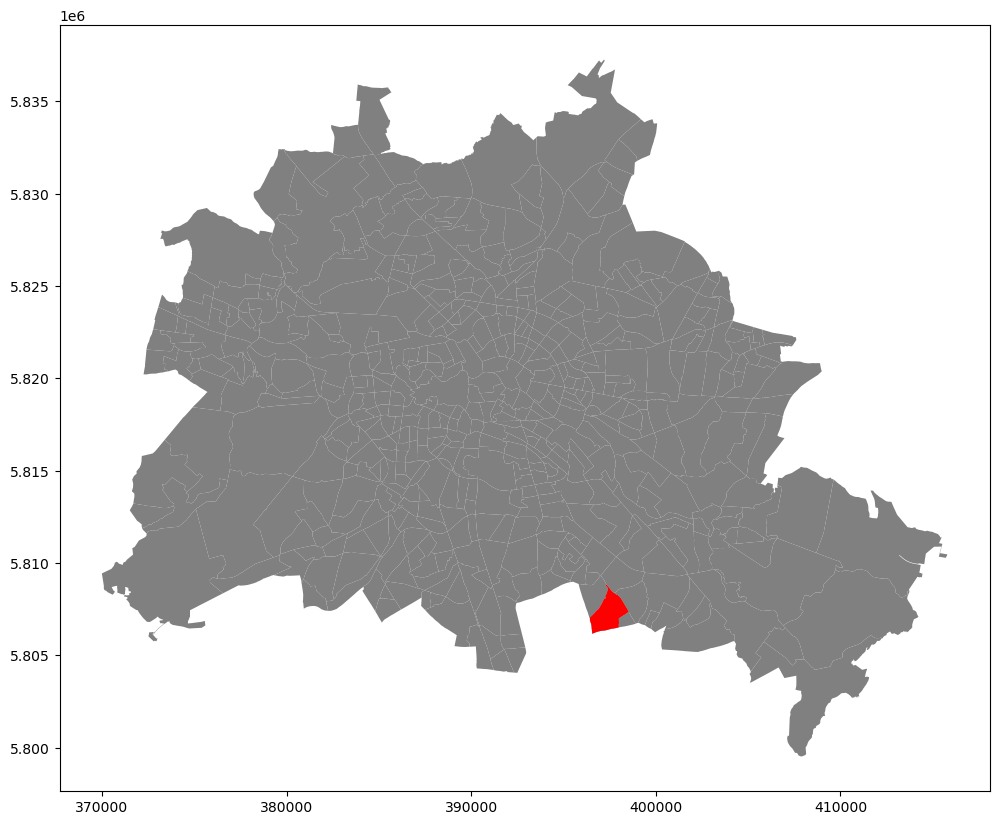

In [77]:
# plotting the geometries
berlin = gdf.plot(color='grey', figsize=(12, 12));
# optional: comment out the next line to highlight a particular suburb in red...
gdf[gdf['plr_name'] == 'Waßmannsdorfer Chaussee'].plot(ax=berlin, color='red')


Kepler for beautiful visuals: https://kepler.gl/,
can be used in jupyter notebooks as well.

That somehow looks like Berlin which makes us quite confident to proceed to try to merge the sets, since our bike theft data is not yet inside our geodataframe (or vice versa) - those are still two seperate data sets.  

So - we need to have a look at the column that allow us to merge ...

In [78]:
# bike thefts lor column
thefts_df.lor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39137 entries, 0 to 39136
Series name: lor
Non-Null Count  Dtype
--------------  -----
39137 non-null  int64
dtypes: int64(1)
memory usage: 305.9 KB


In [79]:
# geodataframe lor column
gdf.plr_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 542 entries, 0 to 541
Series name: plr_id
Non-Null Count  Dtype 
--------------  ----- 
542 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


Not that easy, again.  
- The column 'lor' in the bike theft data is an integer.  
- Integers as numeric values can't have leading zeros.  
- That's why it sometimes is 8 digits, sometimes is just 7 digits long - it then misses a leading 0 - we need to impute!  

In the geodataframe, the lor column is an object, which means a string in this case.  
Feel free to have a closer look ...

In [80]:
# Calculate maximum and minimum length for numeric columns

# The .astype(str) converts the numeric values to strings.
# The .apply(len) calculates the length of each string.

max_lengths = thefts_df_enriched['lor'].astype(str).apply(len).max()
min_lengths = thefts_df_enriched['lor'].astype(str).apply(len).min()

# Print the results
print(f"Maximum length: {max_lengths}")
print(f"Minimum length: {min_lengths}")

Maximum length: 8
Minimum length: 7


In [81]:
# change the lor column datatype to string and call new column 'lor_str'
thefts_df_enriched['lor_str']= thefts_df_enriched['lor'].astype(str)
thefts_df_enriched

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder,lor_str
0,2020-09-10,10,2020-09-10,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,3400723
1,2020-09-09,16,2020-09-10,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,9200716
2,2020-09-10,15,2020-09-10,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,6100207
3,2020-09-10,20,2020-09-10,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,1300733
4,2020-09-09,22,2020-09-10,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,8100207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39132,2021-08-06,18,2021-08-09,8,1100309,600,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,1100309
39133,2021-08-07,13,2021-08-09,8,1200522,3300,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,1200522
39134,2021-08-07,11,2021-08-09,9,6100102,499,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,6100102
39135,2021-08-09,13,2021-08-09,14,2200211,300,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,2200211


In [82]:
thefts_df_enriched.lor_str.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39137 entries, 0 to 39136
Series name: lor_str
Non-Null Count  Dtype 
--------------  ----- 
39137 non-null  object
dtypes: object(1)
memory usage: 305.9+ KB


In [83]:
# fill leading gaps up to 8 characters with zeros and call the new column accordingly to the geodataframe
# example 3400723 to 03400723

# The zfill() method is used to pad the left side of strings with zeros.
# It ensures that the resulting string has a specified minimum length by adding leading zeros if necessary.
thefts_df_enriched['plr_id'] = thefts_df_enriched['lor_str'].str.zfill(8)
thefts_df_enriched.tail(10)

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder,lor_str,plr_id
39127,2021-08-08,21,2021-08-09,10,3601141,2500,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,3601141,03601141
39128,2021-08-08,16,2021-08-09,16,1300834,867,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,1300834,01300834
39129,2021-08-08,20,2021-08-09,10,3400721,533,Nein,Kinderfahrrad,Fahrraddiebstahl,0,0,0,1,0,0,0,0,3400721,03400721
39130,2021-08-06,22,2021-08-09,6,11300721,100,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,11300721,11300721
39131,2021-08-08,19,2021-08-09,7,11300619,533,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,11300619,11300619
39132,2021-08-06,18,2021-08-09,8,1100309,600,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,1100309,01100309
39133,2021-08-07,13,2021-08-09,8,1200522,3300,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,1200522,01200522
39134,2021-08-07,11,2021-08-09,9,6100102,499,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,6100102,06100102
39135,2021-08-09,13,2021-08-09,14,2200211,300,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,2200211,02200211
39136,2021-08-09,8,2021-08-09,12,6100102,1400,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,6100102,06100102


In [84]:
#before dropping not needed columns, let's check
thefts_df_enriched[['plr_id','lor_str']].head()

,plr_id,lor_str
0,03400723,3400723
1,09200716,9200716
2,06100207,6100207
3,01300733,1300733
4,08100207,8100207


In [85]:
max_lengths_2 = thefts_df_enriched['plr_id'].astype(str).apply(len).max()
min_lengths_2 = thefts_df_enriched['plr_id'].astype(str).apply(len).min()

# Print the results
print(f"Maximum length: {max_lengths_2}")
print(f"Minimum length: {min_lengths_2}")

Maximum length: 8
Minimum length: 8


In [86]:
#...looks good in our sample check :-)

In [87]:
# dropping no longer needed columns
thefts_df_enriched.drop(columns=['lor', 'lor_str'], inplace=True)
thefts_df_enriched

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder,plr_id
0,2020-09-10,10,2020-09-10,12,706,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,03400723
1,2020-09-09,16,2020-09-10,7,220,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,09200716
2,2020-09-10,15,2020-09-10,18,550,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,06100207
3,2020-09-10,20,2020-09-10,21,548,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,01300733
4,2020-09-09,22,2020-09-10,11,700,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,08100207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39132,2021-08-06,18,2021-08-09,8,600,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0,01100309
39133,2021-08-07,13,2021-08-09,8,3300,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0,01200522
39134,2021-08-07,11,2021-08-09,9,499,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,06100102
39135,2021-08-09,13,2021-08-09,14,300,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0,02200211


In [88]:
# compare with the geodataframe
display(thefts_df_enriched[['art_des_fahrrads','delikt','plr_id']].head())
display(gdf.head())

,art_des_fahrrads,delikt,plr_id
0,Damenfahrrad,Fahrraddiebstahl,03400723
1,Damenfahrrad,Fahrraddiebstahl,09200716
2,Herrenfahrrad,Fahrraddiebstahl,06100207
3,Herrenfahrrad,Fahrraddiebstahl,01300733
4,Fahrrad,Fahrraddiebstahl,08100207


,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


Now, we are able to merge our dataframes

In [89]:
# merge dataframes 'gdf' and 'thefts_df_enriched' on the plr_id columns
# call new dataframe 'gdf_biketheft'
# what type of merge do we want to do? in our case we only want to keep the rows 
# that match with a plr in  gdf, so we perform 'inner' merge

gdf_biketheft = pd.merge(thefts_df_enriched, gdf, on='plr_id', how='outer')
gdf_biketheft

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder,plr_id,plr_name,geometry
0,2020-09-10,10.0,2020-09-10,12.0,706.0,Nein,Damenfahrrad,Fahrraddiebstahl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03400723,Garbátyplatz,"POLYGON ((392184.653 5825755.672, 392208.002 5..."
1,2020-10-03,14.0,2020-10-03,19.0,399.0,Nein,Fahrrad,Fahrraddiebstahl,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,03400723,Garbátyplatz,"POLYGON ((392184.653 5825755.672, 392208.002 5..."
2,2021-08-09,8.0,2021-08-09,11.0,390.0,Nein,Damenfahrrad,Fahrraddiebstahl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03400723,Garbátyplatz,"POLYGON ((392184.653 5825755.672, 392208.002 5..."
3,2020-10-05,13.0,2020-10-05,13.0,1289.0,Nein,Damenfahrrad,Fahrraddiebstahl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03400723,Garbátyplatz,"POLYGON ((392184.653 5825755.672, 392208.002 5..."
4,2021-08-16,12.0,2021-08-16,13.0,250.0,Nein,Herrenfahrrad,Fahrraddiebstahl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,03400723,Garbátyplatz,"POLYGON ((392184.653 5825755.672, 392208.002 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,2021-05-16,20.0,2021-05-16,22.0,1619.0,Nein,Herrenfahrrad,Fahrraddiebstahl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,09301227,Karolinenhof,"POLYGON ((407621.617 5804645.284, 407620.074 5..."
39135,2021-07-28,18.0,2021-07-29,8.0,1100.0,Nein,Herrenfahrrad,Fahrraddiebstahl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,09301227,Karolinenhof,"POLYGON ((407621.617 5804645.284, 407620.074 5..."
39136,2021-07-28,18.0,2021-07-29,8.0,350.0,Nein,Herrenfahrrad,Fahrraddiebstahl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,09301227,Karolinenhof,"POLYGON ((407621.617 5804645.284, 407620.074 5..."
39137,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05300838,Gartenfeld,"POLYGON ((380426.458 5823676.970, 380427.948 5..."


In [90]:
gdf_biketheft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39139 entries, 0 to 39138
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tatzeit_anfang_datum    39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde   39137 non-null  float64       
 2   tatzeit_ende_datum      39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde     39137 non-null  float64       
 4   schadenshoehe           39137 non-null  float64       
 5   versuch                 39137 non-null  object        
 6   art_des_fahrrads        39137 non-null  object        
 7   delikt                  39137 non-null  object        
 8   type_Damenfahrrad       39137 non-null  float64       
 9   type_Fahrrad            39137 non-null  float64       
 10  type_Herrenfahrrad      39137 non-null  float64       
 11  type_Kinderfahrrad      39137 non-null  float64       
 12  type_Lastenfahrrad      39137 non-null  float6

And so, we are finally able to infer infer the are with the most bikes stolen  
by aggregating count of thefts:

### How many bikethefts per postcode?

In [91]:
gdf_biketheft.columns

Index(['tatzeit_anfang_datum', 'tatzeit_anfang_stunde', 'tatzeit_ende_datum',
       'tatzeit_ende_stunde', 'schadenshoehe', 'versuch', 'art_des_fahrrads',
       'delikt', 'type_Damenfahrrad', 'type_Fahrrad', 'type_Herrenfahrrad',
       'type_Kinderfahrrad', 'type_Lastenfahrrad', 'type_Mountainbike',
       'type_Rennrad', 'type_diverse Fahrräder', 'plr_id', 'plr_name',
       'geometry'],
      dtype='object')

In [92]:
gdf_biketheft.groupby('plr_id').size()

plr_id
01100101     71
01100102    148
01100103    117
01100104    102
01100205     43
           ... 
12601032     17
12601133     22
12601134     64
12601235     33
12601236      8
Length: 542, dtype: int64

In [93]:
gdf_biketheft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39139 entries, 0 to 39138
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tatzeit_anfang_datum    39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde   39137 non-null  float64       
 2   tatzeit_ende_datum      39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde     39137 non-null  float64       
 4   schadenshoehe           39137 non-null  float64       
 5   versuch                 39137 non-null  object        
 6   art_des_fahrrads        39137 non-null  object        
 7   delikt                  39137 non-null  object        
 8   type_Damenfahrrad       39137 non-null  float64       
 9   type_Fahrrad            39137 non-null  float64       
 10  type_Herrenfahrrad      39137 non-null  float64       
 11  type_Kinderfahrrad      39137 non-null  float64       
 12  type_Lastenfahrrad      39137 non-null  float6

In [94]:
# counting thefts in areas
# note: we need .reset_index(name='thefts') to convert the output back to a pandas dataframe.
df_plr_group_thefts = gdf_biketheft.groupby('plr_id')['versuch'].count().reset_index(name='thefts')
# showing new dataframe with plr_id and aggregated count of thefts
df_plr_group_thefts #.tail()

,plr_id,thefts
0,01100101,71
1,01100102,148
2,01100103,117
3,01100104,102
4,01100205,43
...,...,...
537,12601032,17
538,12601133,22
539,12601134,64
540,12601235,33


In [95]:
df_plr_group_thefts[df_plr_group_thefts['thefts']==0]

,plr_id,thefts
99,03300515,0
235,05300838,0


### What's the average monetary value of the thefts per postcode?

In [96]:
# count thefts in areas and store the result in a new df called 'df_plr_group_mean',
# name the column with avg monetary value 'avg_amount'
df_plr_group_mean = gdf_biketheft.groupby('plr_id').agg(avg_amount=('schadenshoehe', 'mean'))

# showing new dataframe with plr_id and aggregated mean of thefts
df_plr_group_mean #.head()

,avg_amount
plr_id,
01100101,1026.619718
01100102,1334.344595
01100103,764.538462
01100104,744.823529
01100205,1196.558140
...,...
12601032,451.117647
12601133,456.590909
12601134,551.625000


### How many thefts per bike type per postcode?

In [97]:
# calculate the number of thefts per bike type per post_code
# and store the result in a new df called 'df_bike_types_count'

df_bike_types_count = gdf_biketheft.groupby(['plr_id', 'art_des_fahrrads'])['art_des_fahrrads'].count()
df_bike_types_count

plr_id    art_des_fahrrads 
01100101  Damenfahrrad         14
          Fahrrad              10
          Herrenfahrrad        41
          Kinderfahrrad         1
          Mountainbike          2
                               ..
12601235  Mountainbike          3
          diverse Fahrräder     2
12601236  Damenfahrrad          4
          Fahrrad               1
          Herrenfahrrad         3
Name: art_des_fahrrads, Length: 3097, dtype: int64

In [98]:
df_bike_types_count_2 = gdf_biketheft.groupby(['plr_id'])\
    .agg({
        'type_Damenfahrrad': 'sum', 
        'type_Fahrrad': 'sum', 
        'type_Herrenfahrrad': 'sum', 
        'type_Kinderfahrrad': 'sum', 
        'type_Lastenfahrrad': 'sum',
        'type_Mountainbike': 'sum',
        'type_Rennrad': 'sum',
        'type_diverse Fahrräder':'sum'
        }).reset_index()
df_bike_types_count_2

,plr_id,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,01100101,14.0,10.0,41.0,1.0,0.0,2.0,0.0,3.0
1,01100102,36.0,14.0,83.0,0.0,0.0,6.0,3.0,6.0
2,01100103,16.0,24.0,62.0,4.0,0.0,10.0,1.0,0.0
3,01100104,24.0,15.0,53.0,1.0,0.0,5.0,3.0,1.0
4,01100205,8.0,13.0,20.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
537,12601032,3.0,2.0,7.0,1.0,0.0,4.0,0.0,0.0
538,12601133,3.0,4.0,11.0,1.0,0.0,2.0,0.0,1.0
539,12601134,19.0,6.0,24.0,4.0,0.0,5.0,1.0,5.0
540,12601235,14.0,4.0,8.0,2.0,0.0,3.0,0.0,2.0


In [99]:
## merging the aggregates into the initial geodataframe

# merge 'df_plr_group_thefts' and 'gdf' and save result as 'gdf_biketheft_1'
gdf_biketheft_1 = pd.merge(df_plr_group_thefts, gdf, on='plr_id')

# merge 'gdf_biketheft_1' and 'df_plr_group_mean' and save result as 'gdf_biketheft_2'
gdf_biketheft_2 = pd.merge(gdf_biketheft_1, df_plr_group_mean, on='plr_id')

# merge 'gdf_biketheft_2' and 'df_bike_types_count' and save result as 'gdf_biketheft'
gdf_biketheft_res = pd.merge(gdf_biketheft_2, df_bike_types_count_2, on='plr_id')
gdf_biketheft_res #.head(5)

,plr_id,thefts,plr_name,geometry,avg_amount,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,01100101,71,Stülerstraße,"POLYGON ((387952.642 5818274.558, 387924.234 5...",1026.619718,14.0,10.0,41.0,1.0,0.0,2.0,0.0,3.0
1,01100102,148,Großer Tiergarten,"POLYGON ((389195.436 5818533.903, 389190.388 5...",1334.344595,36.0,14.0,83.0,0.0,0.0,6.0,3.0,6.0
2,01100103,117,Lützowstraße,"POLYGON ((388847.076 5817874.735, 388835.458 5...",764.538462,16.0,24.0,62.0,4.0,0.0,10.0,1.0,0.0
3,01100104,102,Körnerstraße,"POLYGON ((389319.585 5817775.805, 389310.128 5...",744.823529,24.0,15.0,53.0,1.0,0.0,5.0,3.0,1.0
4,01100205,43,Wilhelmstraße,"POLYGON ((390442.545 5818691.891, 390419.256 5...",1196.558140,8.0,13.0,20.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,12601032,17,Rollbergesiedlung,"POLYGON ((387361.988 5830329.633, 387368.543 5...",451.117647,3.0,2.0,7.0,1.0,0.0,4.0,0.0,0.0
538,12601133,22,Treuenbrietzener Straße,"POLYGON ((389990.688 5829740.615, 389981.590 5...",456.590909,3.0,4.0,11.0,1.0,0.0,2.0,0.0,1.0
539,12601134,64,Märkisches Zentrum,"POLYGON ((388649.621 5828699.069, 388648.807 5...",551.625000,19.0,6.0,24.0,4.0,0.0,5.0,1.0,5.0
540,12601235,33,Dannenwalder Weg,"POLYGON ((389475.323 5828740.790, 389470.683 5...",533.151515,14.0,4.0,8.0,2.0,0.0,3.0,0.0,2.0


In [100]:
gdf_biketheft_res[gdf_biketheft_res['thefts']==0]

,plr_id,thefts,plr_name,geometry,avg_amount,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
99,03300515,0,Blankenburger Süden,"POLYGON ((395473.235 5826177.030, 395448.834 5...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,05300838,0,Gartenfeld,"POLYGON ((380426.458 5823676.970, 380427.948 5...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
gdf_biketheft_res['plr_id'].duplicated().value_counts()

False    542
Name: plr_id, dtype: int64

In [102]:
display(df_plr_group_thefts.head(1))
display(gdf.head(1))
display(df_plr_group_mean.head(1))
display(df_bike_types_count.head(1))

,plr_id,thefts
0,01100101,71


,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."


,avg_amount
plr_id,
01100101,1026.619718


plr_id    art_des_fahrrads
01100101  Damenfahrrad        14
Name: art_des_fahrrads, dtype: int64

In [103]:
gdf_biketheft_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   plr_id                  542 non-null    object  
 1   thefts                  542 non-null    int64   
 2   plr_name                542 non-null    object  
 3   geometry                542 non-null    geometry
 4   avg_amount              540 non-null    float64 
 5   type_Damenfahrrad       542 non-null    float64 
 6   type_Fahrrad            542 non-null    float64 
 7   type_Herrenfahrrad      542 non-null    float64 
 8   type_Kinderfahrrad      542 non-null    float64 
 9   type_Lastenfahrrad      542 non-null    float64 
 10  type_Mountainbike       542 non-null    float64 
 11  type_Rennrad            542 non-null    float64 
 12  type_diverse Fahrräder  542 non-null    float64 
dtypes: float64(9), geometry(1), int64(1), object(2)
memory usage: 59.3+ KB


### Share of thefts per bike type per postcode

In order to answer one of our main questions we need to calculate the shares for each bike type.


In [104]:
# we need the package numpy to round some numbers
import numpy as np

In [105]:
# give nr of thefts per bike type and total thefts, calculcate the share.
# name the new columns in the following form:
# share_Damenfahrrad = nr type_Damenfahrrad / nr thefts

#gdf_biketheft_res['share_Damenfahrrad'] = (gdf_biketheft_res['type_Damenfahrrad'] / gdf_biketheft_res['thefts']).round(2)
#gdf_biketheft_res.head()

In [106]:
bike_types = ['Damenfahrrad', 'Fahrrad', 'Herrenfahrrad', 'Kinderfahrrad', 'Lastenfahrrad', 'Mountainbike', 'Rennrad', 'diverse Fahrräder']

for bike_type in bike_types:
    gdf_biketheft_res[f'share_{bike_type}'] = (gdf_biketheft_res[f'type_{bike_type}'] / gdf_biketheft_res['thefts']).round(2)

gdf_biketheft_res.sample(5)

,plr_id,thefts,plr_name,geometry,avg_amount,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,...,type_Rennrad,type_diverse Fahrräder,share_Damenfahrrad,share_Fahrrad,share_Herrenfahrrad,share_Kinderfahrrad,share_Lastenfahrrad,share_Mountainbike,share_Rennrad,share_diverse Fahrräder
10,01100311,119,Karl-Marx-Allee,"POLYGON ((393213.917 5819901.796, 393195.154 5...",948.369748,36.0,13.0,59.0,5.0,0.0,...,0.0,1.0,0.30,0.11,0.50,0.04,0.0,0.04,0.00,0.01
78,02500830,46,Niederbarnimstraße,"POLYGON ((395599.439 5819096.125, 395595.568 5...",933.630435,11.0,6.0,24.0,4.0,0.0,...,0.0,1.0,0.24,0.13,0.52,0.09,0.0,0.00,0.00,0.02
228,05200631,31,Wilhelmstadt Ost,"POLYGON ((377658.223 5821245.347, 377691.510 5...",709.935484,7.0,2.0,18.0,0.0,0.0,...,0.0,3.0,0.23,0.06,0.58,0.00,0.0,0.03,0.00,0.10
419,09501939,144,Bahnhofstraße,"POLYGON ((402879.681 5811655.530, 402886.688 5...",1113.715278,42.0,15.0,69.0,1.0,0.0,...,4.0,2.0,0.29,0.10,0.48,0.01,0.0,0.08,0.03,0.01
522,12400617,7,Alt-Heiligensee,"POLYGON ((380121.304 5829968.743, 380126.374 5...",524.142857,2.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.29,0.00,0.57,0.14,0.0,0.00,0.00,0.00


In [107]:
# let's look at one example to double check our calculations
gdf_biketheft_res[['plr_id','type_Herrenfahrrad','thefts','share_Herrenfahrrad']].head()

,plr_id,type_Herrenfahrrad,thefts,share_Herrenfahrrad
0,01100101,41.0,71,0.58
1,01100102,83.0,148,0.56
2,01100103,62.0,117,0.53
3,01100104,53.0,102,0.52
4,01100205,20.0,43,0.47


In [108]:
# Think of more ways to check your calculations!

In [109]:
# ok great now we need to calculate the bike type with the highest share for each row...
# we want to store this information in a new column called 'type_highest_share'
# tip: search of a pandas function that fullfills this task! 

gdf_biketheft_res['type_highest_share'] = gdf_biketheft_res[[
    'share_Damenfahrrad', 'share_Fahrrad', 
    'share_Herrenfahrrad', 'share_Kinderfahrrad', 
    'share_Lastenfahrrad', 'share_Mountainbike', 
    'share_Rennrad', 'share_diverse Fahrräder'
    ]].idxmax(axis=1)
gdf_biketheft_res.sample(5)

,plr_id,thefts,plr_name,geometry,avg_amount,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,...,type_diverse Fahrräder,share_Damenfahrrad,share_Fahrrad,share_Herrenfahrrad,share_Kinderfahrrad,share_Lastenfahrrad,share_Mountainbike,share_Rennrad,share_diverse Fahrräder,type_highest_share
55,02200207,118,Gleisdreieck,"POLYGON ((389687.516 5818256.176, 389681.920 5...",946.016949,30.0,12.0,63.0,5.0,0.0,...,2.0,0.25,0.10,0.53,0.04,0.0,0.04,0.01,0.02,share_Herrenfahrrad
216,05200419,1,Am Heideberg,"POLYGON ((374524.360 5822416.135, 374516.116 5...",277.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,share_Herrenfahrrad
425,10100102,12,Rosenbecker Straße,"POLYGON ((403351.907 5825124.678, 403343.830 5...",353.916667,3.0,0.0,6.0,1.0,0.0,...,0.0,0.25,0.00,0.50,0.08,0.0,0.17,0.00,0.00,share_Herrenfahrrad
420,09501940,87,Güterbahnhof Köpenick,"POLYGON ((404085.654 5812507.930, 404075.307 5...",825.666667,18.0,10.0,45.0,3.0,0.0,...,1.0,0.21,0.11,0.52,0.03,0.0,0.07,0.05,0.01,share_Herrenfahrrad
396,09200716,84,Dörpfeldstraße West,"POLYGON ((400937.298 5810353.536, 400937.009 5...",983.404762,20.0,6.0,40.0,5.0,0.0,...,3.0,0.24,0.07,0.48,0.06,0.0,0.11,0.01,0.04,share_Herrenfahrrad


In [110]:
##Filter for the following columns

gdf_biketheft_res[[
    'plr_name','share_Rennrad','share_Fahrrad','share_Damenfahrrad','share_Herrenfahrrad','type_highest_share'
    ]].sample(20)

,plr_name,share_Rennrad,share_Fahrrad,share_Damenfahrrad,share_Herrenfahrrad,type_highest_share
444,Helle Mitte,0.00,0.23,0.38,0.31,share_Damenfahrrad
239,Alt-Gatow,0.00,0.22,0.22,0.56,share_Herrenfahrrad
78,Niederbarnimstraße,0.00,0.13,0.24,0.52,share_Herrenfahrrad
11,Heine-Viertel West,0.01,0.16,0.33,0.45,share_Herrenfahrrad
329,Töpchiner Weg,0.00,0.00,0.13,0.47,share_Herrenfahrrad
519,TXL,0.33,0.33,0.33,0.00,share_Damenfahrrad
172,Hagenplatz,0.09,0.00,0.00,0.45,share_Herrenfahrrad
100,Heinersdorf,0.00,0.09,0.23,0.51,share_Herrenfahrrad
209,Eckschanze,0.00,0.00,0.12,0.53,share_Herrenfahrrad
213,Carl-Schurz-Straße,0.00,0.06,0.50,0.40,share_Damenfahrrad


ok great! We have calculated for each post code what type of bike was stolen the most.

## Retrieve the bike type with the highest share of thefts


In [125]:
# bike type with highest share of thefts
gdf_biketheft_res.groupby('type_highest_share')['thefts'].count() #.sort_values().tail(1)

type_highest_share
share_Damenfahrrad     124
share_Fahrrad            2
share_Herrenfahrrad    412
share_Mountainbike       2
Name: thefts, dtype: int64

In [115]:
gdf_biketheft_res.groupby('type_highest_share').size() #.sort_values().tail(1)

type_highest_share
share_Damenfahrrad     124
share_Fahrrad            2
share_Herrenfahrrad    412
share_Mountainbike       2
dtype: int64

It is __Herrenfahrrad with 438 thefts__ in the observed timeframe!  

---

## Retrieve the postcode with the highest share of thefts


In [130]:
gdf_biketheft_res['thefts'].max()

501

In [132]:
# Retrieve the postcode with the highest share of thefts

gdf_biketheft_res[gdf_biketheft_res.thefts == gdf_biketheft_res.thefts.max()][['plr_name', 'avg_amount', 'thefts']]

,plr_name,avg_amount,thefts
381,Alt-Treptow,791.572854,501


It is __Alt-Treptow with 501 thefts__ in the observed timeframe with an average theft amount of 791 Euro!  

---

Congratulations!  
You made it through another intense notebook - but we hope the little excursions brought some fun ...